# Analyzing TMDB movie database

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Exploration Phase

In [3]:
df = pd.read_csv("tmdb-movies.csv")

In [4]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Null values in Cast column

Filling the null values with "No Info"

In [12]:
df["cast"].fillna("No Info", inplace=True)

### Null values in homepage column

Filling the null values with "No Info"

In [18]:
df.homepage.fillna("No Info", inplace=True)

### Null values in tagline

Filling null values with "No Info"

In [22]:
df.tagline.fillna("No Info", inplace=True)

### Null values in keywords column

Filling null values with "No Info"

In [27]:
df.keywords.fillna("No Info", inplace=True)

### Null values in genres column

Filling null values iwth "No Info"

In [33]:
df.genres.fillna("No Info", inplace=True)

### Null values in production_companies column

Filling null values with "No Info"

In [37]:
df.production_companies.fillna("No Info", inplace=True)

In [41]:
df.imdb_id.fillna("No Info", inplace=True)

In [43]:
df.director.fillna("No Info")

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,No tagline,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,No Info,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,No Homepage,NaN,No tagline,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,No tagline,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,No Homepage,NaN,-,...,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,No Homepage,NaN,No tagline,...,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,No Info,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,...,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,No Homepage,NaN,No tagline,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,No Info,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,No Homepage,NaN,No tagline,...,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,No Homepage,NaN,No tagline,...,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,http://www.paathefilm.com/,NaN,No tagline,...,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10866 non-null object
homepage                10866 non-null object
director                10822 non-null object
tagline                 10866 non-null object
keywords                10866 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj           

There are missing values in cast, homepage, director, tagline, keywords, overview, genres, production_companies, release_date columns which need to be dealt with.

Converting release_date column to date data type

### Missing values in cast column

In [8]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


## Questions to analyze on

<ol>
    <li>Is there a relationship between the year that a movie was released in and the number of votes?</li>
    <li>Is there a relationship between the budget of a movie and its revenue?</li>
    <li>Does the cast affect revenue?</li>
    <li>Does the cast affect voting?</li>
    <li>Does a certain directory attract more revenue?</li>
    <li>Does the run time affect revenue?</li>
    <li>Is there a relationship between genre and casting?</li>
    <li>Does having a website make more people to vote?</li>
    <li>Do certain genres gain more popularity</li>
    <li>Do certain production companies invest more in movies?</li>
    <li>Do people vote only when the movies are not nice?</li>
    <li>Is there a relationship between genres and production companies</li>
    <li>Do movies gain more popularity if a website about it exists?</li>
    <li>Do high budget moview gain more popularity?</li>
    <li>Does the casting affect popularity</li>
    <li>Do directors affect popularity</li>
    <li>Does more run time mean more budget?</li>
</ol>
    
        

## Has the number of votes increased over the years?

In [9]:
year_voteCount = df.groupby('release_year').vote_count.sum().reset_index()
columnLabels = ["year", "no_of_votes"]
year_voteCount.columns = columnLabels
year_voteCount.head(5)

,year,no_of_votes
0,1960,2481
1,1961,2405
2,1962,2392
3,1963,2816
4,1964,3137


In [10]:
year_voteCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
year           56 non-null int64
no_of_votes    56 non-null int64
dtypes: int64(2)
memory usage: 976.0 bytes


Text(0.5, 1.0, 'Year vs Number of votes')

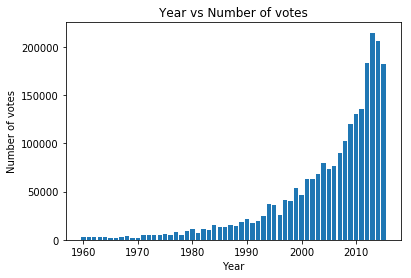

In [11]:
plt.bar(year_voteCount.year,year_voteCount.no_of_votes)
plt.xlabel("Year")
plt.ylabel("Number of votes")
plt.title("Year vs Number of votes")

From the above graph, it seems like the number of votes casted upon movies have increased over the years.
